In [43]:
import pandas as pd


#from GitHub repository
url = "https://raw.githubusercontent.com/robynhathaway/RPDA-PHC-Project/refs/heads/main/PHC_Project_Dataset.csv"
df = pd.read_csv(url)
# df.head()


In [44]:
#convert StatsSA columns from % to ratio

stats_cols = [col for col in df.columns if col.startswith("StatsSA_Households")]

# check and confirm conversion 
for col in stats_cols:
    if df[col].max() > 1:
        print(f"{col} appears to still be in % scale — converting to proportion.")
        df[col] = df[col] / 100
    else:
        print(f"{col} already in proportion scale.")

df[stats_cols].describe().T

StatsSA_Households_Cellphone appears to still be in % scale — converting to proportion.
StatsSA_Households_LandCell (%) appears to still be in % scale — converting to proportion.
StatsSA_Households_MobileInt (%) appears to still be in % scale — converting to proportion.
StatsSA_Households_PubWIFI (%) appears to still be in % scale — converting to proportion.
StatsSA_Households_WorkInt (%) appears to still be in % scale — converting to proportion.
StatsSA_Households_AnyIntAccess (%) appears to still be in % scale — converting to proportion.


,count,mean,std,min,25%,50%,75%,max
StatsSA_Households_Cellphone,156.000,0.899,0.035,0.804,0.880,0.904,0.921,0.951
StatsSA_Households_LandCell (%),156.000,0.052,0.029,0.014,0.035,0.042,0.065,0.147
StatsSA_Households_MobileInt (%),156.000,0.716,0.053,0.608,0.673,0.715,0.757,0.800
StatsSA_Households_PubWIFI (%),156.000,0.071,0.037,0.014,0.047,0.062,0.100,0.149
StatsSA_Households_WorkInt (%),156.000,0.114,0.057,0.035,0.070,0.098,0.169,0.223
StatsSA_Households_AnyIntAccess (%),156.000,0.764,0.072,0.622,0.703,0.759,0.809,0.920


In [45]:
# Remove "(%)" from column names after conversion
df.rename(columns=lambda x: x.replace(" (%)", ""), inplace=True)
# df.head()

In [46]:
#check min and max ranges for all columns

print("Column Ranges (min → max):\n")
for col in df.select_dtypes(include="number").columns:
    col_min = df[col].min()
    col_max = df[col].max()
    print(f"{col}: {col_min:,.2f} → {col_max:,.2f}")

Column Ranges (min → max):

Year: 2,022.00 → 2,024.00
Household_Size: 2.60 → 5.70
Population: 74,630.00 → 12,590,143.00
PHC_Headcount: 190,593.00 → 11,204,359.00
PHC_Facilities_Total: 9.00 → 159.00
Med_Pracs_per100k: 21.62 → 40.91
PHC_Expend_per_capita: 1,077.15 → 2,062.64
StatsSA_Households_Cellphone: 0.80 → 0.95
StatsSA_Households_LandCell: 0.01 → 0.15
StatsSA_Households_MobileInt: 0.61 → 0.80
StatsSA_Households_PubWIFI: 0.01 → 0.15
StatsSA_Households_WorkInt: 0.04 → 0.22
StatsSA_Households_AnyIntAccess: 0.62 → 0.92
Distance_PHC (km): 0.24 → 8.99


In [47]:
#identify right-skewed variables and apply log-transformation

import numpy as np
for col in ["Population", "PHC_Headcount", "Distance_PHC (km)"]:
    df[f"log_{col}"] = np.log1p(df[col])  # log(x+1) to handle zeros safely


# df.head()

In [48]:
#re-check skewness to see if log fixed right skew

cols_of_interest = [
    "Population", "PHC_Headcount",
    "PHC_Facilities_Total", "Med_Pracs_per100k",
    "PHC_Expend_per_capita", "log_Distance_PHC (km)",
    "log_Population", "log_PHC_Headcount"
]


# check skewness values
print("\nSkewness values:")
for col in cols_of_interest:
    if col in df.columns:
        skew_val = df[col].dropna().skew()
        print(f"{col}: {skew_val:.2f}")


Skewness values:
Population: 2.74
PHC_Headcount: 2.12
PHC_Facilities_Total: 0.76
Med_Pracs_per100k: -0.50
PHC_Expend_per_capita: -0.13
log_Distance_PHC (km): 0.83
log_Population: -0.14
log_PHC_Headcount: -0.21


In [49]:
#summary statistics
summarycols = [
    'Population', 'PHC_Headcount', 'PHC_Facilities_Total', 'Med_Pracs_per100k',
    'PHC_Expend_per_capita', 'StatsSA_Households_Cellphone', 'StatsSA_Households_LandCell',
    'StatsSA_Households_MobileInt', 'StatsSA_Households_PubWIFI', 'StatsSA_Households_WorkInt',
    'StatsSA_Households_AnyIntAccess', 'Distance_PHC (km)', 'log_Population',
    'log_PHC_Headcount', 'log_Distance_PHC (km)'
]

# Create a summary DataFrame for just those columns
summary = pd.DataFrame({
    'mean': df[summarycols].mean(),
    'std': df[summarycols].std(),
    'min': df[summarycols].min(),
    'max': df[summarycols].max(),
    'skewness': df[summarycols].skew()
})

# Round for readability
summary = summary.round(3)

# Display as a clean table
pd.set_option("display.float_format", "{:,.3f}".format)
display(summary.round(3))


,mean,std,min,max,skewness
Population,"1,962,889.814","2,204,612.455","74,630.000","12,590,143.000",2.742
PHC_Headcount,"2,683,386.891","2,201,203.432","190,593.000","11,204,359.000",2.120
PHC_Facilities_Total,67.423,37.350,9.000,159.000,0.758
Med_Pracs_per100k,32.927,4.924,21.622,40.906,-0.497
PHC_Expend_per_capita,"1,540.792",265.858,"1,077.148","2,062.643",-0.128
StatsSA_Households_Cellphone,0.899,0.035,0.804,0.951,-0.836
StatsSA_Households_LandCell,0.052,0.029,0.014,0.147,1.416
StatsSA_Households_MobileInt,0.716,0.053,0.608,0.800,0.008
StatsSA_Households_PubWIFI,0.071,0.037,0.014,0.149,0.359
StatsSA_Households_WorkInt,0.114,0.057,0.035,0.223,0.662


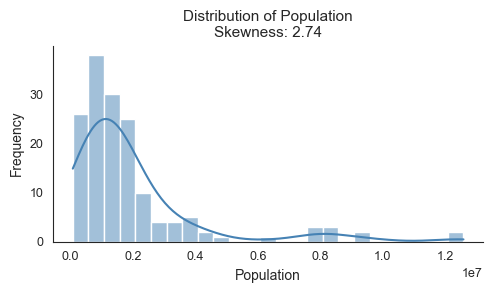

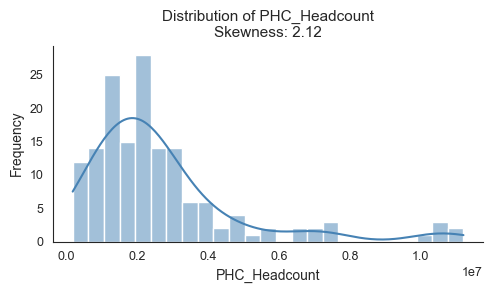

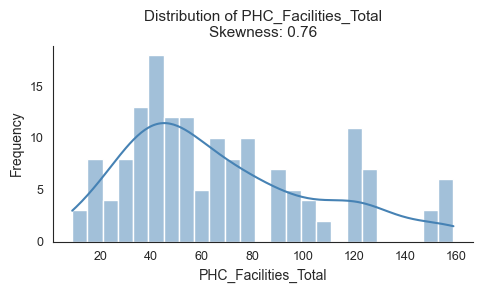

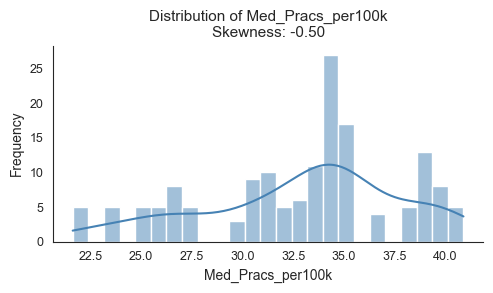

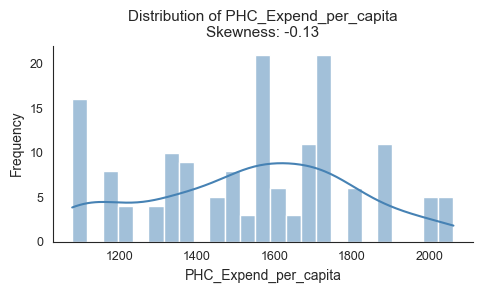

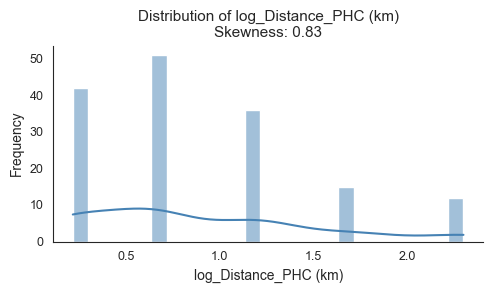

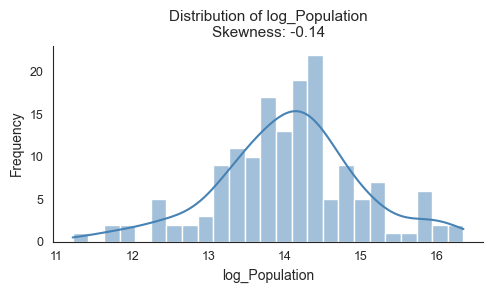

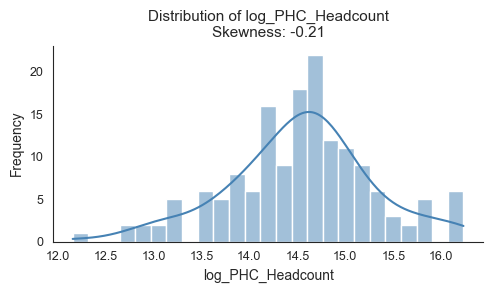

In [50]:
#plot distributions
        
import matplotlib.pyplot as plt
import seaborn as sns

# Use a clean white background
sns.set_style("white")

for col in cols_of_interest:
    if col in df.columns:
        plt.figure(figsize=(5, 3))
        sns.histplot(df[col].dropna(), kde=True, bins=25, color='steelblue', edgecolor=None)
        plt.title(f"Distribution of {col}\nSkewness: {df[col].dropna().skew():.2f}", fontsize=11)
        plt.xlabel(col, fontsize=10)
        plt.ylabel("Frequency", fontsize=10)
        
        # Remove the background grid and spines
        sns.despine()
        plt.grid(False)
        
        plt.tight_layout()
        plt.show()

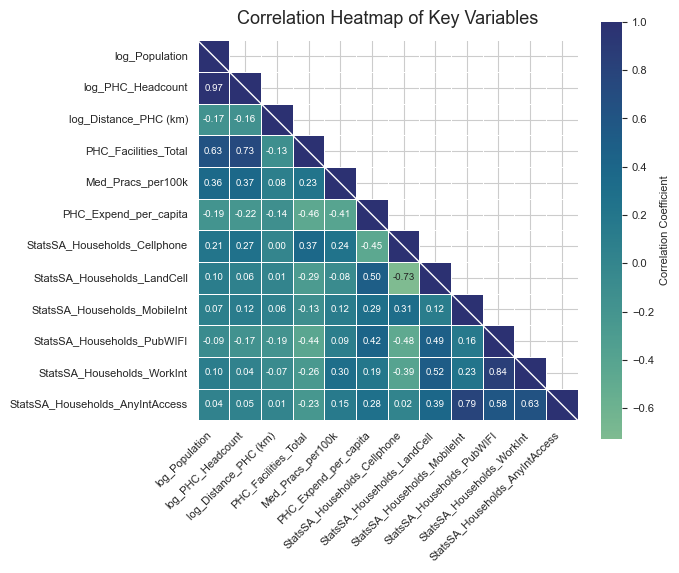

In [51]:
#plot correlation heatmap

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select variables
cols_for_corr = [
    'log_Population',
    'log_PHC_Headcount',
    'log_Distance_PHC (km)',
    'PHC_Facilities_Total',
    'Med_Pracs_per100k',
    'PHC_Expend_per_capita'
] + [c for c in df.columns if 'StatsSA_' in c]

corr = df[cols_for_corr].corr()

# Mask the upper triangle only (keep diagonal visible)
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

plt.figure(figsize=(7, 6))
sns.set_style("whitegrid")

# Draw heatmap
ax = sns.heatmap(
    corr,
    mask=mask,
    cmap="crest",           # clean blue-green palette
    center=0,
    annot=True,
    fmt=".2f",
    linewidths=0.4,
    linecolor='white',
    cbar_kws={'label': 'Correlation Coefficient'},
    square=True,
    annot_kws={"size": 7}
)

# Remove the diagonal '1.00' text but keep blue squares
for text in ax.texts:
    if text.get_text() == "1.00":
        text.set_text("")  # Clear the label

# Add thin white diagonal line for separation
plt.plot([0, corr.shape[0]], [0, corr.shape[0]], color='white', lw=1)

# Formatting
plt.title("Correlation Heatmap of Key Variables", fontsize=13, pad=12)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(rotation=0, fontsize=8)

# Match colorbar font sizes
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=8)
cbar.ax.set_ylabel('Correlation Coefficient', fontsize=8)

plt.tight_layout(pad=1.5)
plt.show()


In [52]:
#Z-score summary table

stats_cols = [c for c in df.columns if c.startswith("StatsSA_")]
log_dist_col = "log_Distance_PHC (km)"
cols_for_z = [
    "log_Population",
    "log_PHC_Headcount",
    log_dist_col,
    "PHC_Facilities_Total",
    "Med_Pracs_per100k",
    "PHC_Expend_per_capita",
] + stats_cols

cols_for_z = [c for c in cols_for_z if c in df.columns and np.issubdtype(df[c].dtype, np.number)]

# --- Compute z-scores ---
z_scores = (df[cols_for_z] - df[cols_for_z].mean()) / df[cols_for_z].std(ddof=1)
outlier_mask = z_scores.abs() > 3

# --- Create z-score summary table ---
z_summary = pd.DataFrame({
    "Mean Z-Score": z_scores.mean(),
    "Std Dev": z_scores.std(),
    "Max Z": z_scores.max(),
    "Min Z": z_scores.min(),
    "Count Outliers (|z|>3)": outlier_mask.sum()
}).round(2).sort_values("Count Outliers (|z|>3)", ascending=False)

print("\n--- Z-Score Summary Table ---")
print(z_summary)


--- Z-Score Summary Table ---
                                 Mean Z-Score  Std Dev  Max Z  Min Z  \
StatsSA_Households_LandCell            -0.000    1.000  3.230 -1.310   
log_Population                          0.000    1.000  2.440 -3.030   
log_PHC_Headcount                      -0.000    1.000  2.260 -3.150   
log_Distance_PHC (km)                  -0.000    1.000  2.290 -1.080   
PHC_Facilities_Total                    0.000    1.000  2.450 -1.560   
Med_Pracs_per100k                       0.000    1.000  1.620 -2.300   
PHC_Expend_per_capita                  -0.000    1.000  1.960 -1.740   
StatsSA_Households_Cellphone           -0.000    1.000  1.490 -2.690   
StatsSA_Households_MobileInt           -0.000    1.000  1.600 -2.050   
StatsSA_Households_PubWIFI              0.000    1.000  2.110 -1.530   
StatsSA_Households_WorkInt             -0.000    1.000  1.910 -1.380   
StatsSA_Households_AnyIntAccess         0.000    1.000  2.170 -1.990   

                                

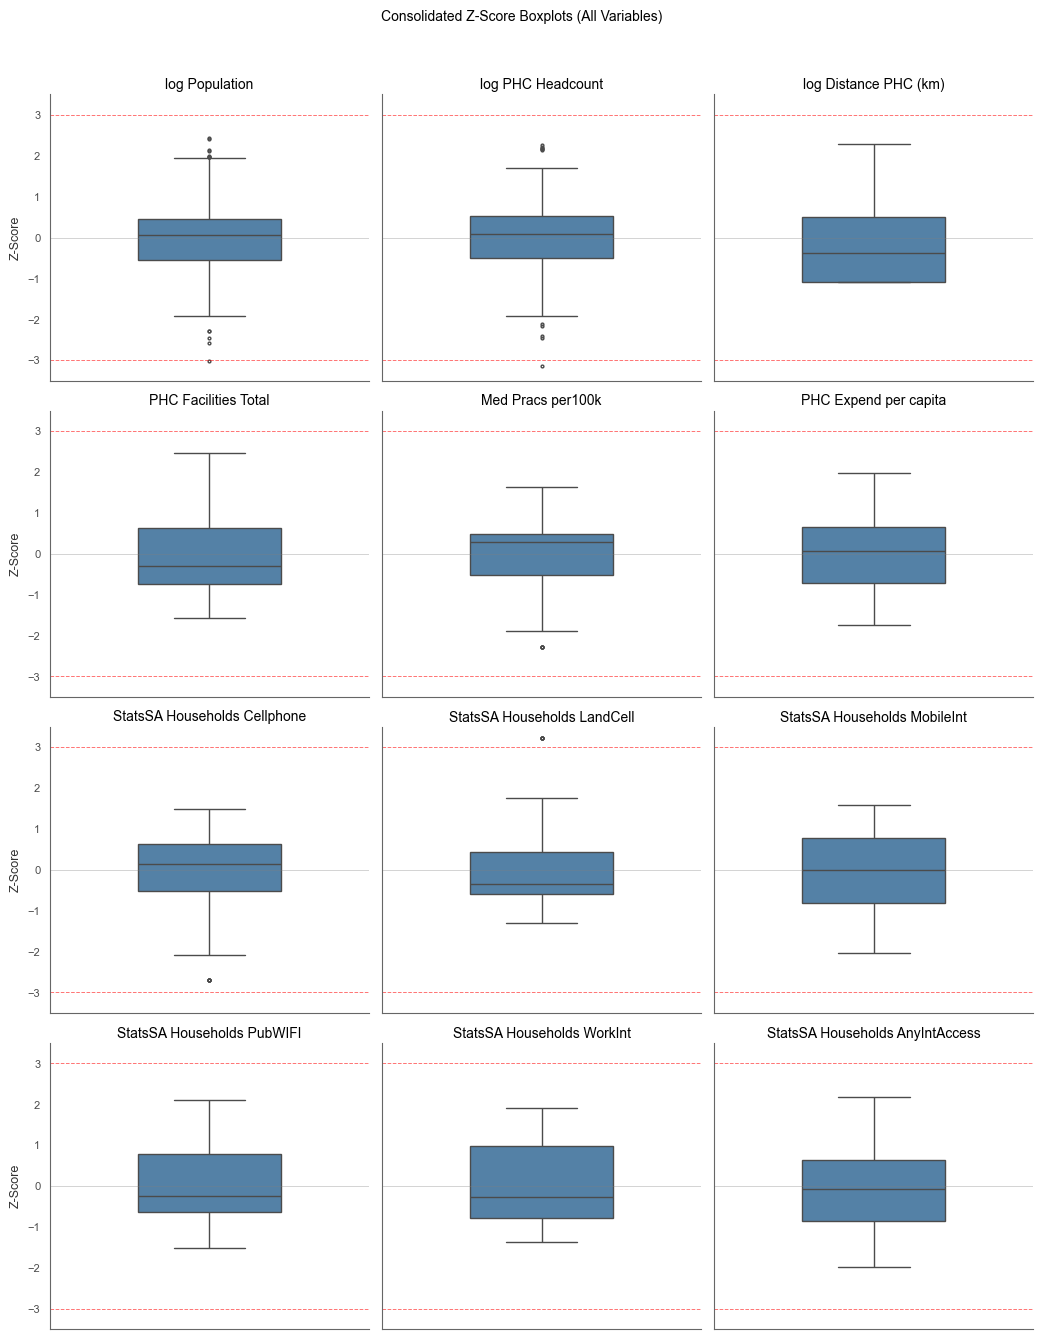

In [53]:
#Z-score box plots

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ---- assumes df and cols_for_z already defined and numeric ----
sns.set_style("white")
plt.rcParams.update({
    "font.family": "Arial",
    "axes.edgecolor": "0.4",
    "axes.labelcolor": "0.2",
    "axes.titlesize": 10,
    "axes.titleweight": "normal",   # not bold
    "axes.labelsize": 9,
    "xtick.color": "0.3",
    "ytick.color": "0.3",
    "figure.facecolor": "white",
    "axes.facecolor": "white",
    "font.size": 9
})

COLOR = "steelblue"
LINE0 = {"ls": "-", "lw": 0.6, "c": "gray", "alpha": 0.4}
LINE3 = {"ls": "--", "lw": 0.7, "c": "red", "alpha": 0.55}

# ---- compute z-scores ----
z = (df[cols_for_z] - df[cols_for_z].mean()) / df[cols_for_z].std(ddof=1)

# ---- arrange panels (4x3 layout) ----
vars_12 = cols_for_z[:12]
rows, cols = 4, 3

fig, axes = plt.subplots(rows, cols, figsize=(cols*3.5, rows*3.4), sharey=True)
axes = axes.flatten()

# ---- draw each boxplot ----
for ax, col in zip(axes, vars_12):
    sns.boxplot(
        y=z[col].dropna(),
        ax=ax,
        width=0.45,
        color=COLOR,
        fliersize=2
    )
    ax.set_title(col.replace("_", " "), pad=4, fontweight="normal", color="black")
    ax.set_xlabel("")
    ax.set_ylabel("Z-Score", color="0.2")
    ax.set_ylim(-3.5, 3.5)
    ax.tick_params(labelsize=8, colors="0.3")
    
    # reference lines
    ax.axhline(0, **LINE0)
    ax.axhline(3, **LINE3)
    ax.axhline(-3, **LINE3)
    
    sns.despine(ax=ax)
    ax.grid(False)

# ---- remove any unused axes ----
for j in range(len(vars_12), len(axes)):
    fig.delaxes(axes[j])

# ---- title and layout ----
fig.suptitle(
    "Consolidated Z-Score Boxplots (All Variables)",
    fontsize=10,
    fontweight="normal",  # consistent with report figures
    color="black",
    y=0.98
)
plt.tight_layout(rect=(0, 0, 1, 0.96))
plt.show()
